In [91]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler 
import numpy as np
from sklearn.model_selection import train_test_split
import os, cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, Activation

In [92]:
data = pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv')
data.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [93]:
data['label'].unique()

array([2, 4, 3, 6, 5, 1, 0])

In [94]:
y = data['label']
x = data.drop(columns = ['label'])

In [95]:
data.isnull().sum().sum() #no null values present

0

In [96]:
meta_data = pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv')
meta_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [97]:
meta_data['dx'].unique()

array(['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec'], dtype=object)

In [98]:
y = data['label']
x = data.drop(columns = ['label'])

In [99]:
data.isnull().sum().sum() #no null values present

0

In [100]:
meta_data = pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv')
meta_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [101]:
meta_data['dx'].unique()

array(['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec'], dtype=object)

Text(0.5, 1.0, 'Frequency Distribution of Classes')

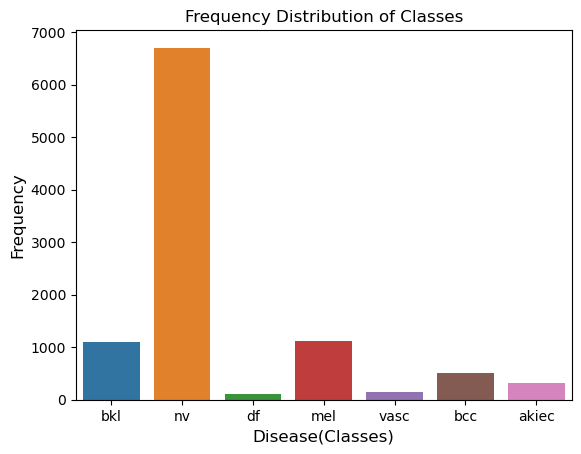

In [102]:
sns.countplot(x = 'dx', data = meta_data)
plt.xlabel('Disease(Classes)', size=12)
plt.ylabel('Frequency', size=12)
plt.title('Frequency Distribution of Classes')


In [103]:
classes = {2:'bkl', 4:'nv', 3:'df', 6:'mel', 5:'vasc', 1:'bcc', 0:'akiec'}

classes_labels=[]
for key in classes.keys():
    classes_labels.append(key)
print(classes_labels)

[2, 4, 3, 6, 5, 1, 0]


In [104]:
print(x.shape,y.shape)
# To overcome class imbalace
oversample = RandomOverSampler()
x,y  = oversample.fit_resample(x,y)
print(x.shape,y.shape)

(10015, 2352) (10015,)
(46935, 2352) (46935,)


In [105]:
# reshaping the data so that it can be taken by convolution neural network(without disturbing the no. of samples)
x = np.array(x).reshape(-1,28,28,3)
print('Shape of X :',x.shape)
print('Shape of y :',y.shape)

Shape of X : (46935, 28, 28, 3)
Shape of y : (46935,)


In [106]:
# Splitting Data
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=1)
print(X_train.shape,Y_train.shape)
print(X_test.shape , Y_test.shape)

(37548, 28, 28, 3) (37548,)
(9387, 28, 28, 3) (9387,)


In [107]:
model_CNN = Sequential()
model_CNN.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
model_CNN.add(MaxPool2D(pool_size = (2,2)))

model_CNN.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model_CNN.add(MaxPool2D(pool_size = (2,2), padding = 'same'))

model_CNN.add(Conv2D(64, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model_CNN.add(MaxPool2D(pool_size = (2,2), padding = 'same'))
model_CNN.add(Conv2D(128, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model_CNN.add(MaxPool2D(pool_size = (2,2), padding = 'same'))

model_CNN.add(Flatten())
model_CNN.add(Dense(64, activation = 'relu'))
model_CNN.add(Dense(32))
model_CNN.add(Activation(activation='relu'))
model_CNN.add(Dense(7))
model_CNN.add(Activation(activation='softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)

model_CNN.compile(loss = 'sparse_categorical_crossentropy',
                 optimizer = optimizer,
                  metrics = ['accuracy'])
print(model_CNN.summary())


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 4, 4, 64)        

In [108]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1, mode='auto')
history = model_CNN.fit(X_train,
                    Y_train,
                    validation_split=0.2,
                    batch_size = 64,
                    epochs = 50,
                    callbacks = [reduce_lr, early_stop])

Epoch 1/50
470/470 [==============================] - 5s 6ms/step - loss: 1.8727 - accuracy: 0.4563 - val_loss: 1.0033 - val_accuracy: 0.6270 - lr: 0.0010
Epoch 2/50
470/470 [==============================] - 3s 6ms/step - loss: 0.8683 - accuracy: 0.6741 - val_loss: 0.7102 - val_accuracy: 0.7502 - lr: 0.0010
Epoch 3/50
470/470 [==============================] - 3s 5ms/step - loss: 0.6263 - accuracy: 0.7668 - val_loss: 0.5594 - val_accuracy: 0.7924 - lr: 0.0010
Epoch 4/50
470/470 [==============================] - 3s 5ms/step - loss: 0.4923 - accuracy: 0.8184 - val_loss: 0.4800 - val_accuracy: 0.8112 - lr: 0.0010
Epoch 5/50
470/470 [==============================] - 3s 5ms/step - loss: 0.3760 - accuracy: 0.8638 - val_loss: 0.3858 - val_accuracy: 0.8571 - lr: 0.0010
Epoch 6/50
470/470 [==============================] - 3s 6ms/step - loss: 0.3122 - accuracy: 0.8880 - val_loss: 0.2938 - val_accuracy: 0.8892 - lr: 0.0010
Epoch 7/50
470/470 [==============================] - 3s 5ms/step - lo

In [109]:
results = model_CNN.evaluate(X_test , Y_test, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 0.13174
Test Accuracy: 97.87%


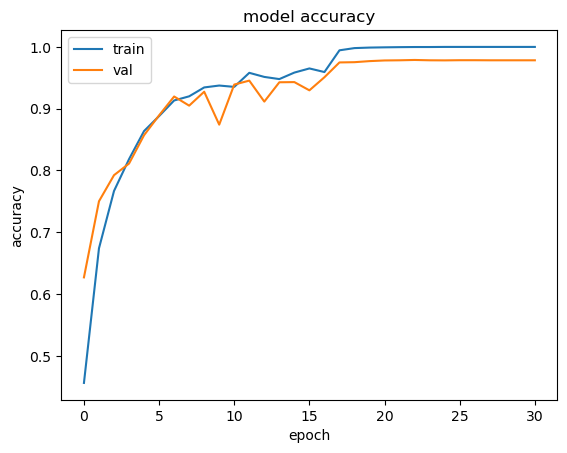

In [110]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

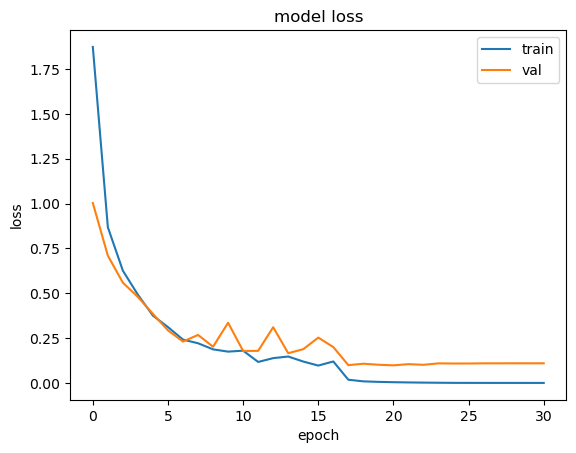

In [111]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [112]:
from sklearn.metrics import confusion_matrix , classification_report

y_true_CNN = list(Y_test)
y_pred_CNN = model_CNN.predict(X_test)
y_pred_CNN = list(map(lambda x: np.argmax(x), y_pred_CNN))
print('Y Actual Values :' , y_true_CNN[0:10])
print('Y Predicted Values :' , y_pred_CNN[0:10])

294/294 [==============================] - 1s 2ms/step
Y Actual Values : [5, 1, 4, 0, 5, 0, 2, 0, 3, 2]
Y Predicted Values : [5, 1, 4, 0, 5, 0, 2, 0, 3, 2]


[[1239   12    0    7    0    3    1]
 [  57 1202    6   95    2   10    2]
 [   0    0 1351    0    0    0    0]
 [   3    2    0 1360    0    0    0]
 [   0    0    0    0 1358    0    0]
 [   0    0    0    0    0 1318    0]
 [   0    0    0    0    0    0 1359]]


<AxesSubplot:>

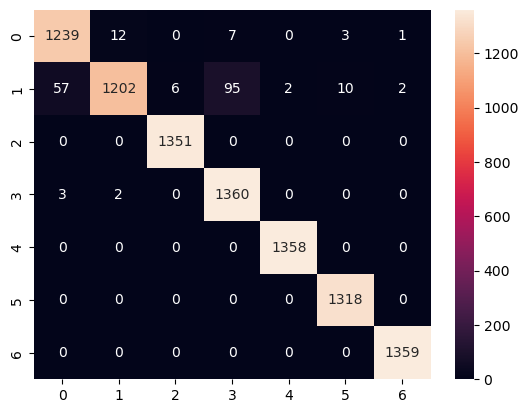

In [113]:
cm_CNN = confusion_matrix(y_true_CNN,y_pred_CNN,labels=classes_labels)
print(confusion_matrix(y_true_CNN,y_pred_CNN,labels=classes_labels))
sns.heatmap(cm_CNN, annot = True, fmt='')

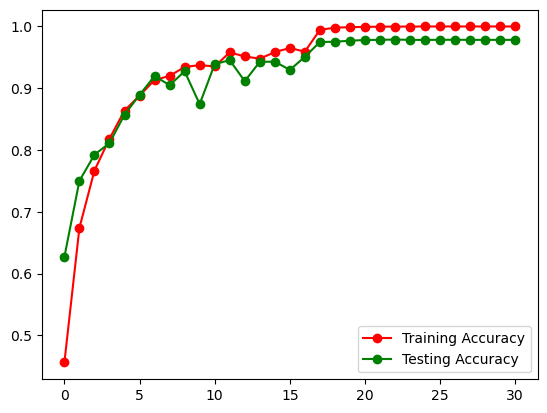

In [114]:
#training acc vs testing acc graph
plt.plot(history.history["accuracy"] , 'ro-' , label = "Training Accuracy")
plt.plot(history.history["val_accuracy"] , 'go-' , label = "Testing Accuracy")
plt.legend()
plt.show()

In [115]:
#predicting
y_pred_CNN  = model_CNN.predict(X_test)
target_names = [f"{classes[i]}" for i in range(7)]
print(len(Y_test) ,"  ",len(y_pred_CNN))
y_pred_CNN = list(map(lambda x: np.argmax(x), y_pred_CNN))
print(classification_report(Y_test , y_pred_CNN,target_names=target_names))

294/294 [==============================] - 1s 2ms/step
9387    9387
              precision    recall  f1-score   support

       akiec       1.00      1.00      1.00      1359
         bcc       0.99      1.00      1.00      1318
         bkl       0.95      0.98      0.97      1262
          df       1.00      1.00      1.00      1351
          nv       0.99      0.87      0.93      1374
        vasc       1.00      1.00      1.00      1358
         mel       0.93      1.00      0.96      1365

    accuracy                           0.98      9387
   macro avg       0.98      0.98      0.98      9387
weighted avg       0.98      0.98      0.98      9387



In [116]:
# Layers definitions
from keras import backend as K
for l in range(len(model_CNN.layers)):
    print(l, model_CNN.layers[l])

0 <keras.layers.convolutional.conv2d.Conv2D object at 0x7f3f0dc6a210>
1 <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f3f0dc6a810>
2 <keras.layers.convolutional.conv2d.Conv2D object at 0x7f3eec94bb90>
3 <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f3eee559c10>
4 <keras.layers.convolutional.conv2d.Conv2D object at 0x7f3f0d646f90>
5 <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f3eed0973d0>
6 <keras.layers.convolutional.conv2d.Conv2D object at 0x7f3eee22aed0>
7 <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f3f0eb68b50>
8 <keras.layers.reshaping.flatten.Flatten object at 0x7f3eecf18c10>
9 <keras.layers.core.dense.Dense object at 0x7f3f0ead9250>
10 <keras.layers.core.dense.Dense object at 0x7f3f0d5519d0>
11 <keras.layers.core.activation.Activation object at 0x7f3eed094f50>
12 <keras.layers.core.dense.Dense object at 0x7f3eeb9f1e90>
13 <keras.layers.core.activation.Activation object at 0x7f3f0d45e210>


In [117]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
kerasBKED = os.environ["KERAS_BACKEND"] 
print(kerasBKED)

tensorflow


In [118]:
import tensorflow as tf
# feature_extractor = tf.keras.Model(inputs=model_CNN.input, 
#                                     outputs=model_CNN.get_layer(-2).output)
# output_layers_model =tf.keras.Model(inputs=model_CNN.input, outputs=model_CNN.output)
# cnn_layer_output = model_CNN.layers[-2].output
# cnn_model_features = tf.keras.Model(inputs=model_CNN.input, outputs=cnn_layer_output)
cnn_model_features = tf.keras.Model(inputs=model_CNN.input, outputs=model_CNN.layers[-2].output)


In [119]:
# Extract features from input data using the CNN model
X_train_cnn = cnn_model_features.predict(X_train)
X_test_cnn = cnn_model_features.predict(X_test)

294/294 [==============================] - 1s 2ms/step


In [120]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':['rbf'], 
              'C':[1, 10, 100, 1000],
              'gamma':[1e-3, 1e-4]}
clf = GridSearchCV(SVC(), parameters)
clf.fit(X_train_cnn, Y_train)
# Evaluate the combined CNN-SVM model on a test dataset
svm_accuracy = clf.score(X_test_cnn, Y_test)
print('SVM Accuracy:', svm_accuracy*100)

SVM Accuracy: 98.50857568978374


In [121]:
svm_accuracy = clf.score(X_test_cnn, Y_test)
print('SVM Accuracy:', svm_accuracy*100)
svmclf = clf.best_estimator_
print(svmclf)
svmclf.fit(X_train_cnn, Y_train)

SVM Accuracy: 98.50857568978374
SVC(C=1000, gamma=0.0001)


SVC(C=1000, gamma=0.0001)

In [122]:
y_testSVM = svmclf.predict(X_test_cnn)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(classification_report(Y_test, y_testSVM))
print("Accuracy: {0}".format(accuracy_score(Y_test, y_testSVM)*100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1359
           1       0.99      1.00      1.00      1318
           2       0.96      0.99      0.98      1262
           3       1.00      1.00      1.00      1351
           4       0.99      0.91      0.95      1374
           5       1.00      1.00      1.00      1358
           6       0.95      1.00      0.97      1365

    accuracy                           0.99      9387
   macro avg       0.99      0.99      0.98      9387
weighted avg       0.99      0.99      0.98      9387

Accuracy: 98.50857568978374


In [123]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parameters = {"max_depth": [3],
              "max_features": [1],
              "min_samples_split": [3],
              "min_samples_leaf": [3],
              "bootstrap": [True],
              "criterion": ["entropy"],
              "n_estimators": [10]}
rclf = RandomForestClassifier()
rgclf = GridSearchCV(rclf, param_grid=parameters)
rgclf.fit(X_test_cnn, Y_test)
RFC_accuracy = clf.score(X_test_cnn, Y_test)
print('Random Forest Classifier Accuracy:', RFC_accuracy*100)

Random Forest Classifier Accuracy: 98.50857568978374


In [124]:
RFclf = rgclf.best_estimator_
RFclf.fit(X_test_cnn, Y_test)
print(RFclf)
y_testRFC = RFclf.predict(X_test_cnn)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(classification_report(Y_test, y_testRFC))
print("Accuracy: {0}".format(accuracy_score(Y_test, y_testRFC)*100))

RandomForestClassifier(criterion='entropy', max_depth=3, max_features=1,
                       min_samples_leaf=3, min_samples_split=3,
                       n_estimators=10)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1359
           1       0.90      1.00      0.95      1318
           2       0.95      0.90      0.92      1262
           3       0.96      1.00      0.98      1351
           4       0.98      0.68      0.81      1374
           5       0.96      1.00      0.98      1358
           6       0.86      1.00      0.92      1365

    accuracy                           0.94      9387
   macro avg       0.94      0.94      0.94      9387
weighted avg       0.94      0.94      0.94      9387

Accuracy: 93.92777245126238


In [125]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

parameters = {"n_neighbors": [1, 5, 10,30],
              "weights": ['uniform', 'distance'],
              "metric": ['minkowski','euclidean','manhattan'],
              "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute']}
kclf = KNeighborsClassifier()
kgclf = GridSearchCV(kclf, param_grid=parameters)
kgclf.fit(X_test_cnn, Y_test)
KNN_accuracy = kgclf.score(X_test_cnn, Y_test)
print('KNN Classifier Accuracy:', KNN_accuracy*100)

KNN Classifier Accuracy: 100.0


In [126]:
y_testKNN = kgclf.predict(X_test_cnn)
KNNclf = kgclf.best_estimator_
print(KNNclf)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print(classification_report(Y_test, y_testKNN))
print("Accuracy: {0}".format(accuracy_score(Y_test, y_testKNN)*100))

KNeighborsClassifier(metric='manhattan', n_neighbors=1)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1359
           1       1.00      1.00      1.00      1318
           2       1.00      1.00      1.00      1262
           3       1.00      1.00      1.00      1351
           4       1.00      1.00      1.00      1374
           5       1.00      1.00      1.00      1358
           6       1.00      1.00      1.00      1365

    accuracy                           1.00      9387
   macro avg       1.00      1.00      1.00      9387
weighted avg       1.00      1.00      1.00      9387

Accuracy: 100.0


In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score



# Create a logistic regression object
lr = LogisticRegression()

# Define the hyperparameter grid to search over
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# Perform grid search with 5-fold cross-validation
grid_search_LR = GridSearchCV(lr, param_grid, cv=5)
grid_search_LR.fit(X_test_cnn, Y_test)

# Print the best hyperparameters and the corresponding accuracy score
print("Best hyperparameters: ", grid_search_LR.best_params_)
y_testKNN = grid_search_LR.predict(X_test_cnn)

print(classification_report(Y_test, y_testKNN))
print("Accuracy: {0}".format(accuracy_score(Y_test, y_testKNN)*100))


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Best hyperparameters:  {'C': 10, 'penalty': 'l2'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1359
           1       1.00      1.00      1.00      1318
           2       0.95      0.98      0.97      1262
           3       1.00      1.00      1.00      1351
           4       0.98      0.92      0.95      1374
           5       1.00      1.00      1.00      1358
           6       0.96      0.99      0.98      1365

    accuracy                           0.98      9387
   macro avg       0.98      0.98      0.98      9387
weighted avg       0.98      0.98      0.98      9387

Accuracy: 98.43400447427292


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
